IPO

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from pandas import DataFrame

In [2]:
a=requests.get("https://www.iposcoop.com/last-100-ipos/").text
soup=bs(a,'lxml')

In [ ]:
#df_list = pd.read_html(a)

In [3]:
df_list=pd.read_html(a)

In [4]:
df_list

[                          Company Symbol  ...   Return SCOOP Rating
 0     DoubleVerify Holdings, Inc.     DV  ...    0.00%          S/O
 1       SkyWater Technology, Inc.   SKYT  ...    0.00%          S/O
 2                    UiPath, Inc.   PATH  ...    0.00%          S/O
 3               Infobird Co., Ltd   IFBD  ...   50.75%          S/O
 4        Troika Media Group, Inc.   TRKA  ...  -24.82%          S/O
 ..                            ...    ...  ...      ...          ...
 95      Global Internet of People    SDH  ...  -24.75%          S/O
 96  Baosheng Media Group Holdings   BAOS  ...  -11.00%          S/O
 97               Angion Biomedica   ANGN  ...  -16.88%          S/O
 98           Bolt Biotherapeutics   BOLT  ...   21.70%          S/O
 99                CN Energy Group   CNEY  ...    9.75%          S/O
 
 [100 rows x 10 columns]]

In [ ]:
#st = {0:'IPO'}

In [ ]:
#stock_exchanges = list()
#for st_e in df_list:
  #stock_exchanges.append(st_e)

In [5]:
stock_exchanges=list()
for st_e in df_list:
  stock_exchanges.append(st_e)

In [6]:
ipos=stock_exchanges[0]

In [ ]:
#ipos=stock_exchanges[0]
#ipos

,Company,Symbol,Industry,Offer Date,Shares (millions),Offer Price,1st Day Close,Current Price,Return,SCOOP Rating
0,"Akoya Biosciences, Inc.",AKYA,Health Care,4/16/2021,6.6,$20.00,$26.05,$26.05,30.25%,S/O
1,Biomea Fusion,BMEA,Health Care,4/16/2021,9.0,$17.00,$18.60,$18.60,9.41%,S/O
2,Recursion Pharmaceuticals,RXRX,Health Care,4/16/2021,24.2,$18.00,$31.30,$31.30,73.89%,S/O
3,"agilon health, inc.",AGL,Health Care,4/15/2021,46.6,$23.00,$31.00,$30.00,30.43%,S/O
4,"Esports Technologies, Inc.",EBET,Consumer Services,4/15/2021,2.4,$6.00,$36.42,$25.35,322.50%,S/O
...,...,...,...,...,...,...,...,...,...,...
95,Fifth Wall Acquisition Corp. I,FWAA,Blank Check,2/5/2021,30.0,$10.00,$11.10,$10.29,2.90%,S/O
96,Immunocore Holdings Limited,IMCR,Health Care,2/5/2021,9.9,$26.00,$43.20,$38.25,47.12%,S/O
97,"Lucira Health, Inc.",LHDX,Health Care,2/5/2021,9.0,$17.00,$24.98,$7.84,-53.88%,S/O
98,Pharvaris B.V.,PHVS,Health Care,2/5/2021,8.3,$20.00,$29.00,$27.92,39.60%,S/O


In [7]:
print(ipos.columns)

Index(['Company', 'Symbol', 'Industry', 'Offer Date', 'Shares (millions)',
       'Offer Price', '1st Day Close', 'Current Price', 'Return',
       'SCOOP Rating'],
      dtype='object')


In [ ]:
#print(ipos.columns)

Index(['Company', 'Symbol', 'Industry', 'Offer Date', 'Shares (millions)',
       'Offer Price', '1st Day Close', 'Current Price', 'Return',
       'SCOOP Rating'],
      dtype='object')


In [8]:
ipox = ipos.rename({'Offer Date': 'OfferDate',
                    'Shares (millions)':'Shares',
                    'Offer Price':'OfferPrice',
                    '1st Day Close':'Day1Close',
                    'Current Price':'CurrentPrice',
                    'SCOOP Rating':'SCOOP'}, axis=1) ##original name: new name

In [9]:
ipox.head()

,Company,Symbol,Industry,OfferDate,Shares,OfferPrice,Day1Close,CurrentPrice,Return,SCOOP
0,"DoubleVerify Holdings, Inc.",DV,Technology,4/21/2021,13.3,$27.00,$0.00,$0.00,0.00%,S/O
1,"SkyWater Technology, Inc.",SKYT,Technology,4/21/2021,7.0,$14.00,$0.00,$0.00,0.00%,S/O
2,"UiPath, Inc.",PATH,Technology,4/21/2021,23.9,$56.00,$0.00,$0.00,0.00%,S/O
3,"Infobird Co., Ltd",IFBD,Technology,4/20/2021,6.3,$4.00,$6.03,$6.03,50.75%,S/O
4,"Troika Media Group, Inc.",TRKA,Consumer Services,4/20/2021,5.8,$4.15,$3.12,$3.12,-24.82%,S/O


In [10]:
ipox.OfferPrice=[x.strip('$') for x in ipox.OfferPrice]
ipox.CurrentPrice = [x.strip('$') for x in ipox.CurrentPrice]
ipox.Day1Close = [x.strip('$') for x in ipox.Day1Close]
ipox.Return = [x.strip('%') for x in ipox.Return]

In [11]:
ipox.head()

,Company,Symbol,Industry,OfferDate,Shares,OfferPrice,Day1Close,CurrentPrice,Return,SCOOP
0,"DoubleVerify Holdings, Inc.",DV,Technology,4/21/2021,13.3,27.00,0.00,0.00,0.00,S/O
1,"SkyWater Technology, Inc.",SKYT,Technology,4/21/2021,7.0,14.00,0.00,0.00,0.00,S/O
2,"UiPath, Inc.",PATH,Technology,4/21/2021,23.9,56.00,0.00,0.00,0.00,S/O
3,"Infobird Co., Ltd",IFBD,Technology,4/20/2021,6.3,4.00,6.03,6.03,50.75,S/O
4,"Troika Media Group, Inc.",TRKA,Consumer Services,4/20/2021,5.8,4.15,3.12,3.12,-24.82,S/O


In [ ]:
print (ipox.dtypes)

Company          object
Symbol           object
Industry         object
OfferDate        object
Shares          float64
OfferPrice       object
Day1Close        object
CurrentPrice     object
Return           object
SCOOP            object
dtype: object


In [12]:
ipox['OfferPrice'] = ipox['OfferPrice'].astype(float)
ipox['Day1Close'] = ipox['Day1Close'].astype(float)
ipox['CurrentPrice'] = ipox['CurrentPrice'].astype(float)
ipox['Return'] = ipox['Return'].astype(float)

# show the datatypes
print (ipox.dtypes)

Company          object
Symbol           object
Industry         object
OfferDate        object
Shares          float64
OfferPrice      float64
Day1Close       float64
CurrentPrice    float64
Return          float64
SCOOP            object
dtype: object


In [13]:
ipox.describe()

,Shares,OfferPrice,Day1Close,CurrentPrice,Return
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,20.056000,21.014500,23.28170,20.836100,13.722600
std,26.853859,38.191373,34.14506,32.946948,89.816205
min,1.100000,4.000000,0.00000,0.000000,-59.900000
25%,6.450000,10.000000,10.00000,9.945000,-12.880000
50%,12.000000,16.000000,17.24500,14.765000,0.800000
75%,24.400000,20.000000,30.22000,23.337500,15.762500
max,198.900000,381.000000,328.28000,320.820000,804.500000


In [ ]:
type(ipox)

pandas.core.frame.DataFrame

What was the main Industry type of the recent 2020s

In [ ]:
#sectors=ipox['Industry'].value_counts()

In [14]:
sectors=ipox['Industry'].value_counts()

In [ ]:
sectors

Health Care          38
Technology           19
Blank Check          18
Consumer Services     9
Consumer Goods        7
Industrials           4
Financials            3
Other                 2
Name: Industry, dtype: int64

Visualise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

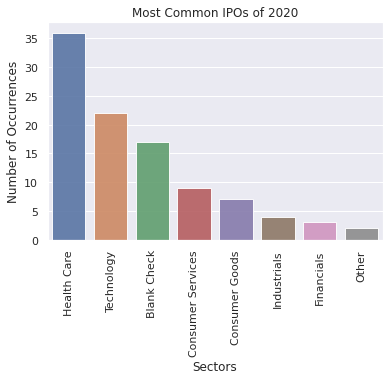

In [16]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set(style="darkgrid")
sns.set(style="darkgrid")
#sns.barplot(sectors.index, sectors.values, alpha=0.9)
sns.barplot(sectors.index,sectors.values, alpha=0.9)
#plt.title('Most Common IPOs of 2020')
plt.title('Most Common IPOs of 2020')
#plt.ylabel('Number of Occurrences', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('Sectors', fontsize=12)
plt.xlabel('Sectors',fontsize=12)
plt.xticks(rotation='vertical')
#plt.xticks(rotation=45)
#plt.show()









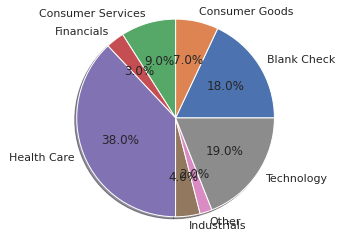

In [ ]:
labels = ipox['Industry'].astype('category').cat.categories.tolist()
counts = ipox['Industry'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [17]:
ipox.groupby(['Industry']).mean()

,Shares,OfferPrice,Day1Close,CurrentPrice,Return
Industry,,,,,
Blank Check,27.476471,10.000000,9.570588,10.157647,1.576471
Consumer Goods,32.742857,17.285714,20.498571,19.408571,10.162857
Consumer Services,26.377778,51.405556,50.503333,48.190000,31.014444
Financials,4.400000,14.333333,18.300000,15.360000,2.626667
Health Care,11.450000,16.638889,21.339444,17.298889,1.196944
Industrials,7.425000,12.500000,13.600000,12.725000,1.157500
Other,31.400000,20.000000,23.115000,23.860000,14.520000
Technology,25.181818,27.990909,29.259091,26.086364,41.388636
